In [1]:
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [1]:
%matplotlib widget

In [2]:
from sympy import *
from sympy.plotting import plot3d

In [3]:
init_session()

IPython console for SymPy 1.9 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [4]:
def ener_pot(w, q, D, nu, x0, x1, y0, y1):
    ener_def = D*((w.diff(x, 2) + w.diff(y, 2))**2
              - 2*(1 - nu)*(w.diff(x, 2)*w.diff(y, 2) - w.diff(x, y)**2))
    pot_ext = q*w
    return integrate(ener_def/2 - pot_ext, (x, x0, x1), (y, y0, 1))

In [5]:
a1, a2, a3, a4, a5, a6 = symbols("a1 a2 a3 a4 a5 a6")
D, nu = symbols("D nu")

In [6]:
w = x * y * (1 - x) * (1 - y) * (a1 + a2*x + a3*y + a4*x**2 + a5*x*y + a6*y**2)
w

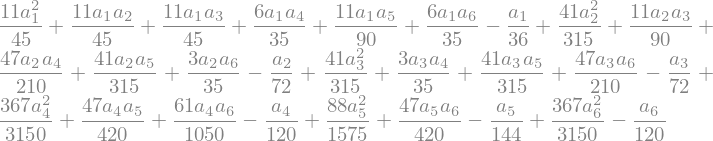

In [7]:
Pi_6 = ener_pot(w, 1, 1, nu, 0, 1, 0, 1)
Pi_6

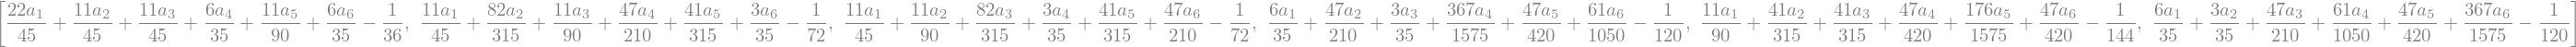

In [8]:
eqs = [Pi_6.diff(a1),
       Pi_6.diff(a2),
       Pi_6.diff(a3),
       Pi_6.diff(a4),
       Pi_6.diff(a5),
       Pi_6.diff(a6)]
eqs

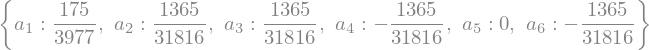

In [9]:
a_sol = solve(eqs, [a1, a2, a3, a4, a5, a6])
a_sol

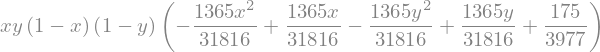

In [10]:
w_sol = w.subs(a_sol)
w_sol

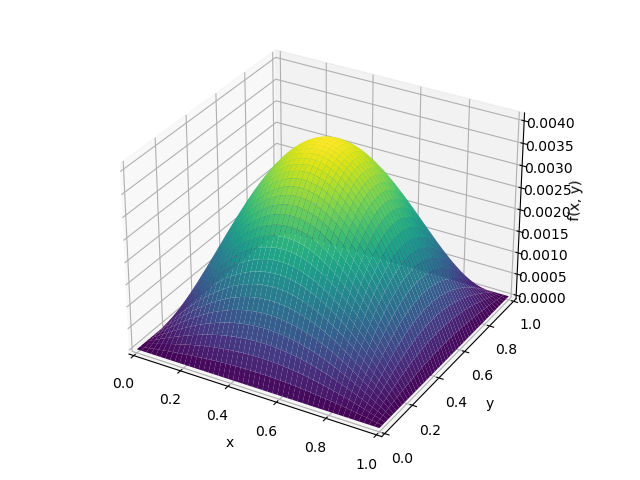

In [11]:
plot3d(w_sol, (x, 0, 1), (y, 0, 1))